In [1]:
##-----------------------------------------------------------
## 1. Thư viện
##-----------------------------------------------------------
import joblib as jlb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
##-----------------------------------------------------------
## 2. Đọc dữ liệu
##-----------------------------------------------------------
folder = '../'  # thay bằng đường dẫn phù hợp
data = pd.read_csv(folder + '../Data/Shopping.csv')
print("Dữ liệu ban đầu:")
print(data.head())

Dữ liệu ban đầu:
   CustomerID   Genre  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


In [3]:
##-----------------------------------------------------------
## 3. Tiền xử lý dữ liệu
##-----------------------------------------------------------
# Chuyển cột 'Genre' thành dạng số
data = pd.get_dummies(data, columns=['Genre'], dtype='int', drop_first=True)
print("\nSau khi mã hóa nhị phân:")
print(data.head())


Sau khi mã hóa nhị phân:
   CustomerID  Age  Annual Income  Spending Score  Genre_Male
0           1   19             15              39           1
1           2   21             15              81           1
2           3   20             16               6           0
3           4   23             16              77           0
4           5   31             17              40           0


In [4]:
# Chọn các cột đặc trưng
x = data[['Age', 'Annual Income', 'Spending Score']]

In [5]:
# Chuẩn hóa dữ liệu để tránh scale lệch nhau
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
##-----------------------------------------------------------
## 4. Xây dựng mô hình KMeans
##-----------------------------------------------------------
k = 5
model = KMeans(n_clusters=k, random_state=42)
model.fit(x_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [7]:
# Lưu mô hình
jlb.dump(model, folder + '/Output/kMeans.mdl')

['..//Output/kMeans.mdl']

In [9]:
##-----------------------------------------------------------
## 5. Kết quả gom cụm
##-----------------------------------------------------------
data['cluster'] = model.labels_

print(f"\n*** {k} trọng tâm sau khi chuẩn hóa:")
print(model.cluster_centers_)

print("\nKích thước các cụm:", Counter(model.labels_))
print("Hai cụm lớn nhất:", Counter(model.labels_).most_common(2))


*** 5 trọng tâm sau khi chuẩn hóa:
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]

Kích thước các cụm: Counter({np.int32(0): 58, np.int32(3): 45, np.int32(1): 40, np.int32(4): 31, np.int32(2): 26})
Hai cụm lớn nhất: [(np.int32(0), 58), (np.int32(3), 45)]


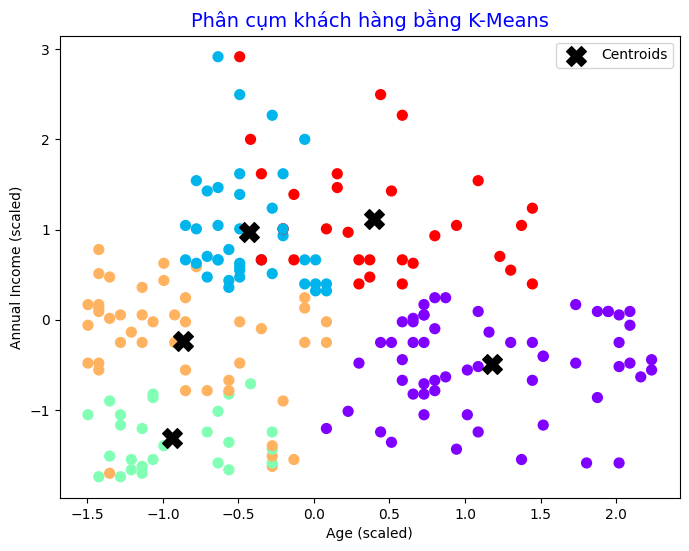

In [11]:
##-----------------------------------------------------------
## 6. Trực quan hóa kết quả (với 2 biến chính)
##-----------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=model.labels_, cmap='rainbow', s=50)
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='X', c='black', label='Centroids')
plt.title("Phân cụm khách hàng bằng K-Means", fontsize=14, color='blue')
plt.xlabel("Age (scaled)")
plt.ylabel("Annual Income (scaled)")
plt.legend()
plt.show()

### 1. K-Means là gì?
- K-Means là thuật toán gom cụm (clustering) thuộc nhóm học không giám sát (Unsupervised Learning).
- Mục tiêu là chia dữ liệu thành k nhóm (cluster) sao cho:
    - Các điểm trong cùng cụm thì giống nhau nhiều nhất.
    - Các điểm ở khác cụm thì khác nhau nhiều nhất.

### 2. Cách hoạt động (các bước thuật toán)
- Giả sử bạn muốn chia khách hàng thành 4 nhóm dựa trên Tuổi (Age) và Thu nhập (Income).
    - Bước 1️⃣ – Chọn ngẫu nhiên k tâm cụm ban đầu:
        - Ví dụ, bạn chọn 4 điểm ngẫu nhiên trong dữ liệu làm “trọng tâm” ban đầu của 4 cụm.

    - Bước 2️⃣ – Gán từng điểm dữ liệu vào cụm gần nhất:
        - Mỗi khách hàng được gán vào cụm có trọng tâm gần nhất (theo khoảng cách Euclidean).

    - Bước 3️⃣ – Cập nhật lại trọng tâm cụm:
        - Tính trung bình các điểm trong từng cụm → cập nhật trọng tâm mới.

    - Bước 4️⃣ – Lặp lại Bước 2 và 3:
        - Cho đến khi các cụm không còn thay đổi đáng kể (hội tụ).

### 3. Hàm mục tiêu cần tối ưu
- K-Means cố gắng giảm thiểu tổng bình phương sai số (SSE):

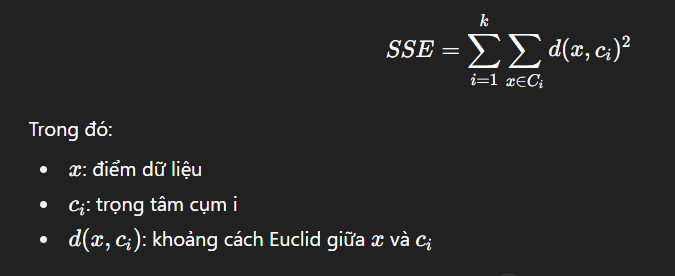

### 4. Ưu nhược
| Ưu điểm                           | Nhược điểm                                       |
| --------------------------------- | ------------------------------------------------ |
| Tốc độ nhanh, dễ cài đặt          | Chỉ hoạt động tốt với dữ liệu **số (numerical)** |
| Hiệu quả với dữ liệu lớn          | Nhạy cảm với **outliers**                        |
| Kết quả dễ hiểu, dễ trực quan hóa | Cần chọn trước **k** (số cụm)                    |
| Hiệu quả với dữ liệu lồi (convex) | Có thể rơi vào cực trị địa phương                |

### 5. Ví dụ dễ hiểu
| Tuổi | Thu nhập |
| ---- | -------- |
| 20   | 15       |
| 22   | 18       |
| 35   | 50       |
| 40   | 52       |
| 60   | 80       |

- Nếu chọn k = 2, K-Means có thể tạo:
    - Cụm 1: khách hàng trẻ, thu nhập thấp
    - Cụm 2: khách hàng lớn tuổi, thu nhập cao